# Investigando um conjunto de dados: Titanic

> Análise descritiva de dados sobre o naufrágio do navio Titanic em 15 de abril de 1912.

[![NDFDSI nanodegree](https://img.shields.io/badge/udacity-NDFDSI-02b3e4.svg?style=flat)](https://br.udacity.com/course/python-fundamentos-data-science--nd110)

## Sobre o conjunto de dados

In [76]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic-data-6.csv')

# Visão geral
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Este conjunto de dados engloba dados sobre o naufrágio do navio Titanic. A seguir as descrições de cada coluna do conjunto são especificadas:
- **PassengerId**: identificador único do passageiro
- **Survived**: indicador de sobrevivência
- **Pclass**: status socioeconômico (1 = alto, 2 = médio, 3 = baixo)
- **Name**: nome do passageiro
- **Sex**: sexo do passageiro
- **Age**: idade do passageiro (a idade é fracionária se menor que 1. Se a idade é estimada, está no formato xx.5)
- **SibSp**: número de irmãos e cônjuges abordo
- **Parch**: número de pais/filhos abordo
- **Ticket**: número da passagem
- **Fare**: taxa do passageiro
- **Cabin**: número da cabine
- **Embarked**: local de embarque

In [80]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [81]:
# Tipos de dados de cada coluna
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Limpeza de dados

In [82]:
# Colunas do conjunto de dados
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [83]:
# Renomear colunas para o padrão snake case
df.rename(columns={'PassengerId': 'passenger_id', 'Survived': 'survived', 'Pclass': 'p_class', 'Name': 'name', 'Sex': 'sex', 'SibSp': 'sib_sp', 'Age': 'age', 'Parch': 'parch', 'Ticket': 'ticket', 'Fare': 'fare', 'Cabin': 'cabin', 'Embarked': 'embarked'}, inplace=True)
list(df)

['passenger_id',
 'survived',
 'p_class',
 'name',
 'sex',
 'age',
 'sib_sp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked']

In [84]:
# Dimensões do conjunto de dados
df.shape

(891, 12)

In [85]:
# Verificar se existem linhas com valores nulos/faltando
df.isnull().sum()

passenger_id      0
survived          0
p_class           0
name              0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              0
cabin           687
embarked          2
dtype: int64

In [86]:
# Descartar linhas com valores nulos
df.dropna(inplace=True, how='any')

# Checar a operação
df.isnull().sum().any()

False

In [87]:
# Verificar se existem dados duplicados
duplicated = df.duplicated().sum()
print('Existem {} valores duplicados neste conjunto de dados.'.format(duplicated))

Existem 0 valores duplicados neste conjunto de dados.


In [88]:
# Valores únicos para survived
df['survived'].unique()

array([1, 0])

In [89]:
# Trocar os valores 0 e 1 por algo mais legível
df['survived'].replace([1, 0], ['yes', 'no'], inplace=True)
df['survived'].unique()

array(['yes', 'no'], dtype=object)

In [90]:
# Valores únicos para embarked
df['embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [91]:
# Trocar os valores C, S e Q por algo mais legível
df['embarked'].replace(['C', 'S', 'Q'], ['Cherbourg', 'Southampton', 'Queenstown'], inplace=True)
df['embarked'].unique()

array(['Cherbourg', 'Southampton', 'Queenstown'], dtype=object)

In [92]:
# Visão geral dos dados atualmente
df.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
6,7,no,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton
10,11,yes,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,Southampton
11,12,yes,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,Southampton


## Perguntas

### P1: Quantas pessoas sobreviveram ao naufrágio? Quantos sobreviventes são do sexo masculino? Quantos são do sexo feminino?

In [93]:
# Quantas pessoas sobreviveram ao naufrágio?
num_survivors = df[df['survived']=='yes'].count()[0]
num_deceased = df.shape[0] - num_survivors
print('De {} pessoas, {} sobreviveram ao naufrágio e {} faleceram.'.format(df.shape[0], num_survivors, num_deceased))

De 183 pessoas, 123 sobreviveram ao naufrágio e 60 faleceram.


In [73]:
# Quantos sobreviventes são do sexo masculino?
num_male_survivors = df[(df['survived']=='yes') & (df['sex']=='male')].count()[0]
print('De {} sobreviventes, {} são do sexo masculino.'.format(num_survivors, num_male_survivors))

De 123 sobreviventes, 41 são do sexo masculino.


In [74]:
# Quantos sobreviventes são do sexo feminino?
num_female_survivors = df[(df['survived']=='yes') & (df['sex']=='female')].count()[0]
print('De {} sobreviventes, {} são do sexo feminino.'.format(num_survivors, num_female_survivors))

De 123 sobreviventes, 82 são do sexo feminino.


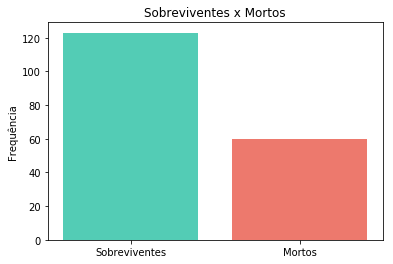

In [106]:
# Sobreviventes x Mortos
num_survivors_deceased = np.array([num_survivors, num_deceased])
label = ['Sobreviventes', 'Mortos']
index = np.arange(len(label))
plt.bar(index, num_survivors_deceased, align='center', alpha=0.75, color=['#1abc9c', '#e74c3c'])
plt.xlabel('')
plt.ylabel('Frequência')
plt.xticks(index, label)
plt.title('Sobreviventes x Mortos')
plt.show()

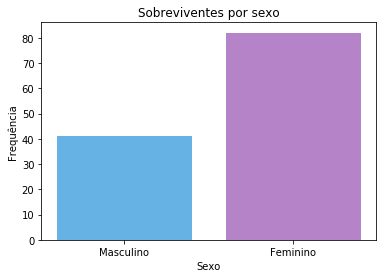

In [108]:
# Sobreviventes por sexo
num_survivors_sex = np.array([num_male_survivors, num_female_survivors])
label = ['Masculino', 'Feminino']
index = np.arange(len(label))
plt.bar(index, num_survivors_sex, align='center', alpha=0.75, color=['#3498db', '#9b59b6'])
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.xticks(index, label)
plt.title('Sobreviventes por sexo')
plt.show()

### P2:

## Conclusão

## Fontes
- [Kaggle - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)